# Chapter 5: RT

## 1. Initialise the code.

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 26 19:14:39 2024

@author: narain

Tested in Python 3.10

This code is used to analyse the radiotherapy simulations and check if we can predict the SF from the NF.
"""

'\nCreated on Mon Feb 26 19:14:39 2024\n\n@author: narain\n\nTested in Python 3.10\n\nThis code is used to analyse the radiotherapy simulations and check if we can predict the SF from the NF.\n'

Import the required libraries and set up the plotting

In [5]:
# Initialise libraries
import pandas as pd
import matplotlib.pyplot as plt# import os
import matplotlib.ticker as ticker
import numpy as np
import os
from pathlib import Path
import matplotlib.ticker as ticker

# Import custom functions
from get_paraview_data import *
from convert_oxygen_units import *
from calculate_surviving_fraction import *

# Set LaTex-style font
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 22})
# sns.set(font='STIXGeneral', font_scale=1.7)

## 2. Import the datasets.

Here, we enter the dataset details.

In [6]:
# Enter the details of the simulation data to analyse
solver_list = ['Constant', 'Pries', 'Memory', 'Fung']
solver_name = solver_list[2]
seed_selection = 60
max_selections = 1001   

# Base directory path
main_folder_path = '/Users/vedang/Documents/GitHub/dphil-scripts/demo_datasets/'
simulation_path = 'vor_size'
# simulation_path = 'vor_flow'
# simulation_path = 'hex_size'
# simulation_path = 'hex_flow'
figure_folder = main_folder_path + simulation_path + '/analysis/'

# Define the range of Selection and Kills to loop over
selection_range = range(1, max_selections+1)

# Import the dataset for the predicted NFs we can just use the deterministic equations
NF_predictions = pd.read_hdf( main_folder_path + simulation_path + '/predictions.h5')
true_NF_dataset = NF_predictions['truth']
predicted_NF_dataset = NF_predictions['all']

## 3. How accurately can we predictly the Lewin SF? 

Pretty accurately.

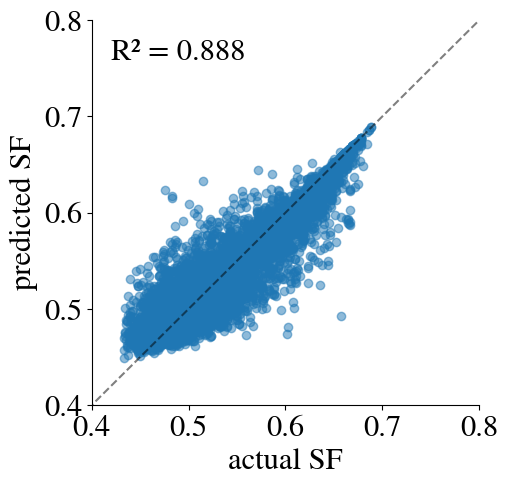

In [7]:
# Compute the Lewin SF deterministically using both sets of NFs
# actual_NF_lewin_computed_SF = compute_Lewin_SF(true_NF_dataset)
actual_NF_lewin_computed_SF = NF_predictions['lewin_SF']
predicted_NF_lewin_computed_SF = compute_Lewin_SF(predicted_NF_dataset)

# Plot the predicted vs real SFs
plt.figure(figsize=(5, 5))
plt.scatter(actual_NF_lewin_computed_SF, predicted_NF_lewin_computed_SF, marker='o', alpha=0.5)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)  # Diagonal line
plt.xlabel('actual SF')
plt.ylabel('predicted SF')
correlation_matrix_lewin = np.corrcoef(actual_NF_lewin_computed_SF, predicted_NF_lewin_computed_SF)
r_squared_lewin = correlation_matrix_lewin[0, 1]**2

# Add R-squared text
ax = plt.gca()
plt.text(0.05, 0.95, f'R² = {r_squared_lewin:.3f}', transform=ax.transAxes, 
         verticalalignment='top')

plt.xlim(0.4, 0.8)
plt.ylim(0.4, 0.8)

# Set white background and remove top/right spines
ax.set_facecolor('white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.show()

In [8]:
# Compute the Wouters SF deterministically 
actual_wouters_SF = NF_predictions['wouters_SF']
actual_wouters_RR = compute_RR(NF_predictions['wouters_SF'], anoxic_SF=calculate_array_Wouters_SF(0))

## 4. How do different metrics predict the Wouters SF (via the Lewin SF)?

NameError: name 'r_squared' is not defined

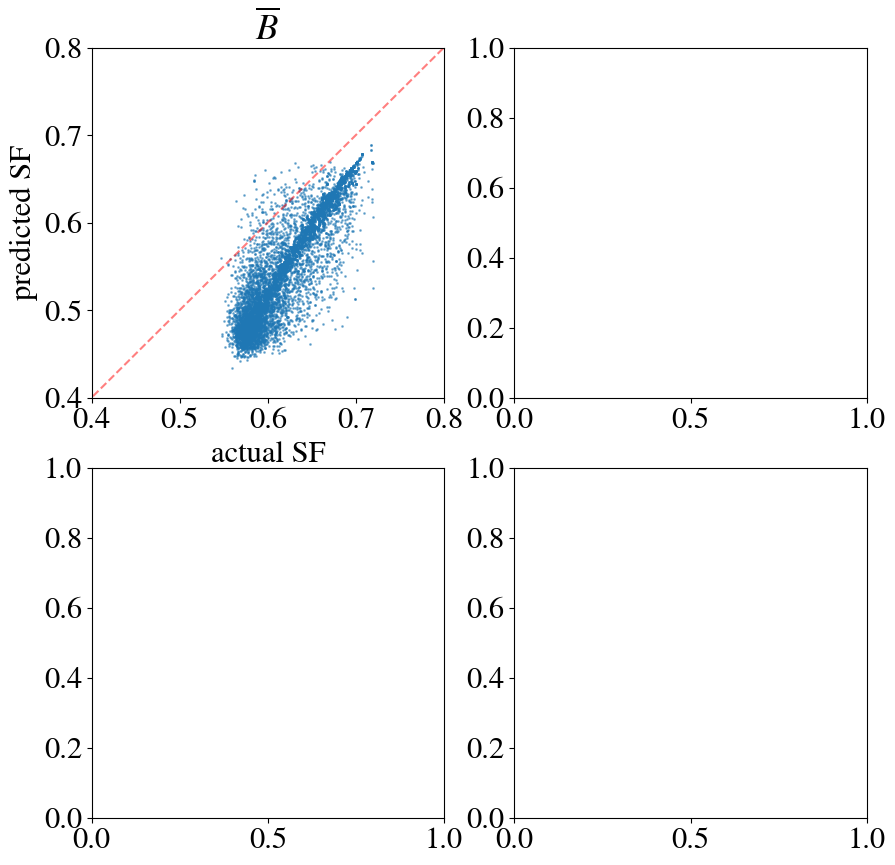

In [9]:
# Create the DataFrame from the data_pairs
# SF_pred = {
#     "PPV": compute_Lewin_SF(NF_predictions['PPV']),
#     "FCD": compute_Lewin_SF(NF_predictions['FCD']),
#     "DBS": compute_Lewin_SF(NF_predictions['DBS']),
#     "wildcard": compute_Lewin_SF(NF_predictions['wildcard']),
#     "beta_1": compute_Lewin_SF(NF_predictions['beta_1']),
#     "all geometrical": compute_Lewin_SF(NF_predictions['all geometrical']),
#     "all perfusion": compute_Lewin_SF(NF_predictions['all perfusion']),
#     "all topological": compute_Lewin_SF(NF_predictions['all topological']),
#     "all": compute_Lewin_SF(NF_predictions['all'])
# }
SF_pred = {
    # "PPV": compute_Lewin_SF(NF_predictions['PPV']),
    # "DBS": compute_Lewin_SF(NF_predictions['DBS']),
    r'$\overline{B}$': compute_Lewin_SF(NF_predictions['wildcard']),
    r'$\overline{β_1}$': compute_Lewin_SF(NF_predictions['beta_1']),
    "FCD": compute_Lewin_SF(NF_predictions['FCD']),
    # "all geometrical": compute_Lewin_SF(NF_predictions['all geometrical']),
    # "all perfusion": compute_Lewin_SF(NF_predictions['all perfusion']),
    "all topological": compute_Lewin_SF(NF_predictions['all topological']),
    # "all topological": compute_RR(compute_Lewin_SF(NF_predictions['all topological']), anoxic_SF=calculate_array_Wouters_SF(0)),
    # "all": compute_Lewin_SF(NF_predictions['all'])
}

# Finding the minimum and maximum value across series
min_values = {key: series.min() for key, series in SF_pred.items()}
overall_min = min(min_values.values())
max_values = {key: series.max() for key, series in SF_pred.items()}
overall_max = min(max_values.values())
overall_min = 0.4
overall_max = 0.8

# Find the extremities to make a square plot
min_limit = min(min(actual_wouters_SF), overall_min)
max_limit = max(max(actual_wouters_SF), overall_max)

# Plot the R-square values
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()
for i, (name, series) in enumerate(SF_pred.items()):  # start=1 starts counting from 1
    axs[i].scatter(actual_wouters_SF, series, alpha=0.5, s=1)
    axs[i].set_title(name)
    axs[i].set_xlabel("actual SF")
    axs[i].set_ylabel("predicted SF")
    
    # Add a diagonal line
    min_val = 0
    max_val = 1
    axs[i].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.5)
    axs[i].set_xlim(overall_min,overall_max)
    axs[i].set_ylim(overall_min,overall_max)

    # Set tick format to be consistent and without decimals
    axs[i].xaxis.set_major_locator(ticker.MaxNLocator(nbins=4, integer=True))
    axs[i].yaxis.set_major_locator(ticker.MaxNLocator(nbins=4, integer=True))

    # Calculate and display R-squared
    correlation_matrix = np.corrcoef(actual_wouters_SF, series)
    # r_squared = correlation_matrix[0, 1]**2
    axs[i].text(0.05, 0.95, f'R² = {r_squared:.3f}', transform=axs[i].transAxes, 
                verticalalignment='top')
plt.tight_layout(pad=1.5, h_pad=1.5)

# Save image
figure_title = 'r_squared_sf_predictions'
file_path = Path(figure_folder + figure_title + '.png').expanduser()
plt.savefig(file_path, dpi=500, bbox_inches = 'tight')
plt.show()

Plot just the RR using the topological metrics

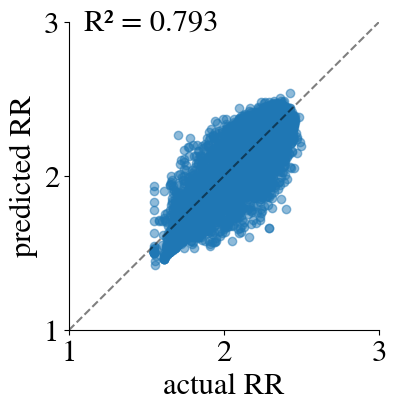

In [11]:
# Compute the Lewin SF deterministically using both sets of NFs
predicted_lewin_RR = compute_RR(compute_Lewin_SF(NF_predictions['all topological']), anoxic_SF=calculate_range_Lewin_SF([0]))
# actual_RR = compute_RR(compute_Lewin_SF(NF_predictions['all topological']), anoxic_SF=calculate_array_Wouters_SF(0))

# Plot the predicted vs real SFs
plt.figure(figsize=(4, 4))
plt.scatter(actual_wouters_RR, predicted_lewin_RR, marker='o', alpha=0.5)
plt.plot([1, 3], [1, 3], 'k--', alpha=0.5)  # Diagonal line
plt.xlabel('actual RR')
plt.ylabel('predicted RR')
correlation_matrix_lewin = np.corrcoef(actual_wouters_RR, predicted_lewin_RR)
r_squared_RR = correlation_matrix_lewin[0, 1]**2

# Add R-squared text
ax = plt.gca()
plt.text(0.05, 0.95, f'R² = {r_squared_RR:.3f}', transform=ax.transAxes, 
         verticalalignment='bottom')

plt.xlim(1.0, 3)
plt.ylim(1.0, 3)

# Set integer ticks for both axes
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Set white background and remove top/right spines
ax.set_facecolor('white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.show()
